In [361]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns # визуализация данных
import numpy as np
%matplotlib inline

все группы

In [362]:
# import os
# lst = os.listdir('./extracted_features')

# lst_data = []
# for folder in lst:
#     for file in os.listdir('./extracted_features/' + folder):
#         lst_data.append(pd.read_csv('./extracted_features/'+ folder + '/' + file))

одна группа

In [363]:
import os
lst = os.listdir('./extracted_features/size_group10')

lst_data = []
for file in lst:
    lst_data.append(pd.read_csv('./extracted_features/size_group10/' + file))

In [364]:
all_data = pd.concat(lst_data, ignore_index=True)
all_data = all_data.drop(['Unnamed: 0'], axis = 1)
all_data

,Average_Angle,Max_Angle,Std_Angle,Average_Dist,Max_Dist,Std_Dist,Average_Time,Max_Time,Std_Time,Condition
0,12.001318,21.477946,6.931247,4.075438,8.062258,2.343247,56.17473,525.7372,156.520824,1
1,5.416143,12.724356,4.558907,11.622584,14.142136,1.309788,4.00243,4.0110,0.006158,1
2,38.061759,353.659808,105.257907,8.651735,12.000000,2.558804,4.00081,4.0150,0.009303,1
3,13.717474,36.869898,15.742660,2.739144,4.000000,0.705045,4.05406,4.5455,0.163928,1
4,1.773146,11.309932,3.475752,8.073288,12.369317,3.118015,4.00088,4.0077,0.003065,1
...,...,...,...,...,...,...,...,...,...,...
52528,31.500000,45.000000,11.463629,1.636506,2.236068,0.471008,4.39982,8.0015,1.200570,1
52529,40.500000,90.000000,26.892172,1.471478,2.236068,0.484514,4.00207,4.0128,0.004582,1
52530,45.000000,90.000000,28.460499,1.407107,2.000000,0.346483,4.40002,8.0017,1.200568,1
52531,54.000000,90.000000,33.674916,1.082843,1.414214,0.165685,4.40195,8.0017,1.199920,1


In [365]:
tired_state = len(all_data[all_data.Condition == 0]) 
awake_state = len(all_data[all_data.Condition == 1]) 
n_samples = tired_state if tired_state < awake_state else awake_state
n_samples

22448

In [366]:
from sklearn.utils import resample
sampled_0 = resample(all_data[all_data.iloc[:, -1] == 0], replace = False, n_samples = n_samples, random_state=39)
sampled_1 = resample(all_data[all_data.iloc[:, -1] == 1], replace = False, n_samples = n_samples, random_state=39)

all_data = pd.concat([sampled_0, sampled_1])

In [367]:
len(all_data[all_data.Condition == 0])

22448

In [368]:
len(all_data[all_data.Condition == 1])

22448

<AxesSubplot:>

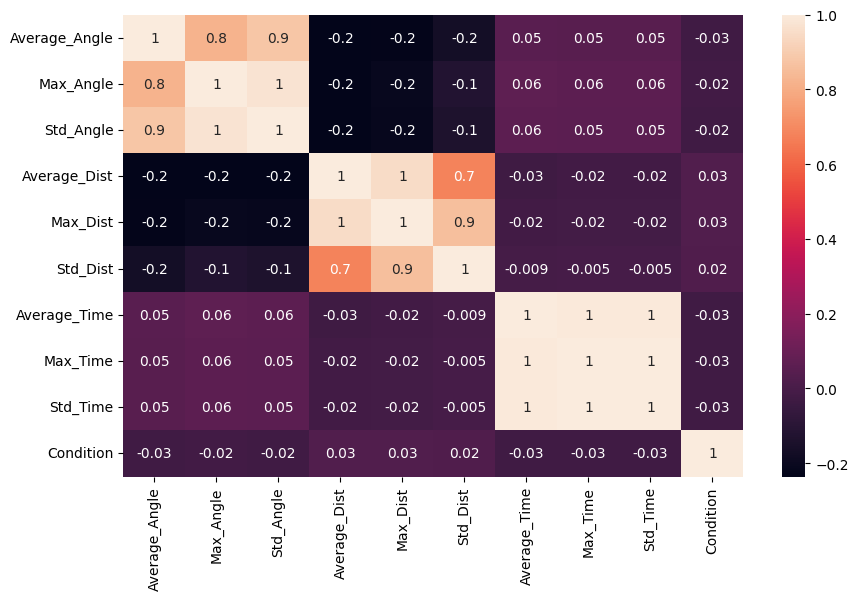

In [369]:
plt.figure(figsize=(10, 6))
sns.heatmap(all_data.corr(), annot = True, fmt = '.1g')

In [370]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44896 entries, 42080 to 7209
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Average_Angle  44896 non-null  float64
 1   Max_Angle      44896 non-null  float64
 2   Std_Angle      44896 non-null  float64
 3   Average_Dist   44896 non-null  float64
 4   Max_Dist       44896 non-null  float64
 5   Std_Dist       44896 non-null  float64
 6   Average_Time   44896 non-null  float64
 7   Max_Time       44896 non-null  float64
 8   Std_Time       44896 non-null  float64
 9   Condition      44896 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 3.8 MB


In [371]:
Dup_Rows = all_data[all_data.duplicated()]
Dup_Rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Average_Angle  0 non-null      float64
 1   Max_Angle      0 non-null      float64
 2   Std_Angle      0 non-null      float64
 3   Average_Dist   0 non-null      float64
 4   Max_Dist       0 non-null      float64
 5   Std_Dist       0 non-null      float64
 6   Average_Time   0 non-null      float64
 7   Max_Time       0 non-null      float64
 8   Std_Time       0 non-null      float64
 9   Condition      0 non-null      int64  
dtypes: float64(9), int64(1)
memory usage: 0.0 bytes


In [372]:
all_data.drop_duplicates(keep='first', inplace = True)

array([[<AxesSubplot:title={'center':'Average_Angle'}>,
        <AxesSubplot:title={'center':'Max_Angle'}>,
        <AxesSubplot:title={'center':'Std_Angle'}>],
       [<AxesSubplot:title={'center':'Average_Dist'}>,
        <AxesSubplot:title={'center':'Max_Dist'}>,
        <AxesSubplot:title={'center':'Std_Dist'}>],
       [<AxesSubplot:title={'center':'Average_Time'}>,
        <AxesSubplot:title={'center':'Max_Time'}>,
        <AxesSubplot:title={'center':'Std_Time'}>],
       [<AxesSubplot:title={'center':'Condition'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

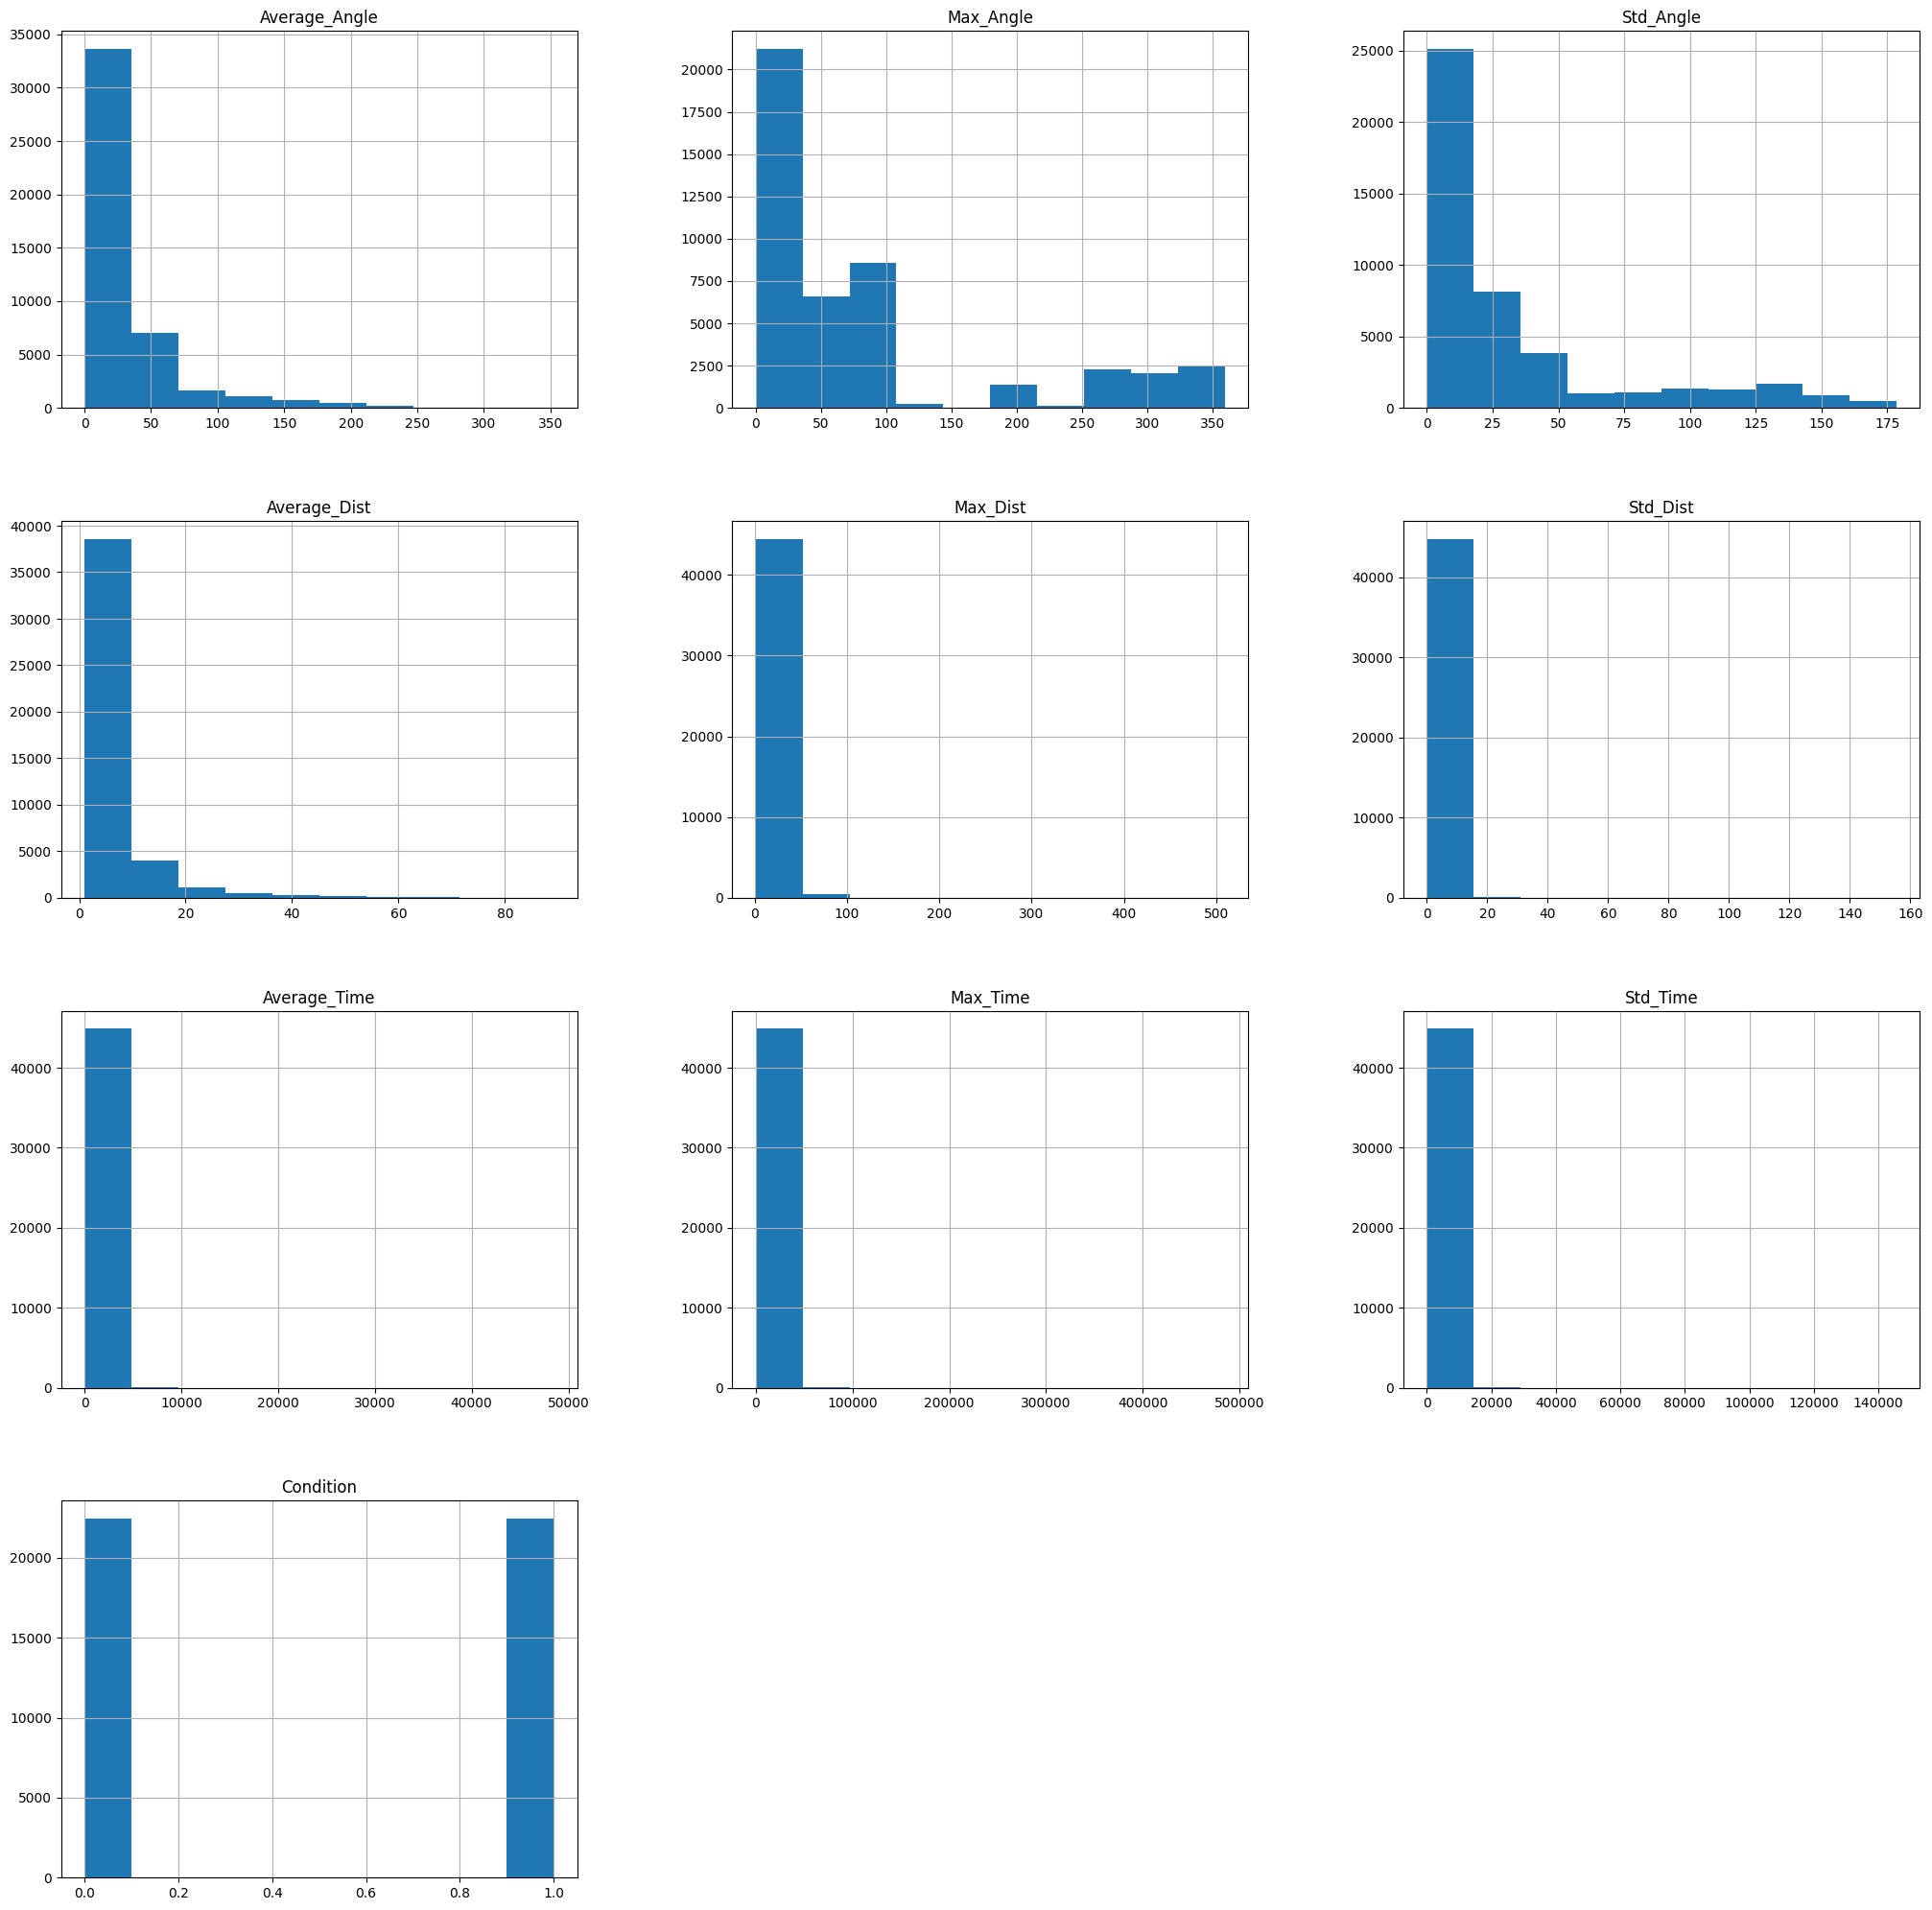

In [373]:
all_data.hist(figsize = (25, 25), grid = True)

<AxesSubplot:xlabel='Max_Dist'>

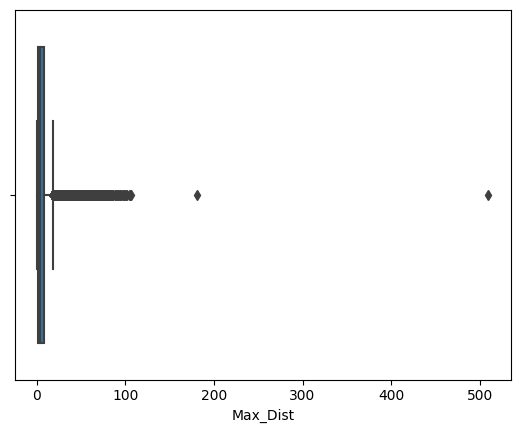

In [374]:
sns.boxplot(x=all_data['Max_Dist'])

In [375]:
Q1 = all_data.quantile(0.25)
Q3 = all_data.quantile(0.75)
IQR = Q3 - Q1
all_data = all_data[~((all_data < (Q1 - 1.5 * IQR)) |(all_data > (Q3 + 1.5 * IQR))).any(axis=1)]
all_data.shape

(25914, 10)

array([[<AxesSubplot:title={'center':'Average_Angle'}>,
        <AxesSubplot:title={'center':'Max_Angle'}>,
        <AxesSubplot:title={'center':'Std_Angle'}>],
       [<AxesSubplot:title={'center':'Average_Dist'}>,
        <AxesSubplot:title={'center':'Max_Dist'}>,
        <AxesSubplot:title={'center':'Std_Dist'}>],
       [<AxesSubplot:title={'center':'Average_Time'}>,
        <AxesSubplot:title={'center':'Max_Time'}>,
        <AxesSubplot:title={'center':'Std_Time'}>],
       [<AxesSubplot:title={'center':'Condition'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

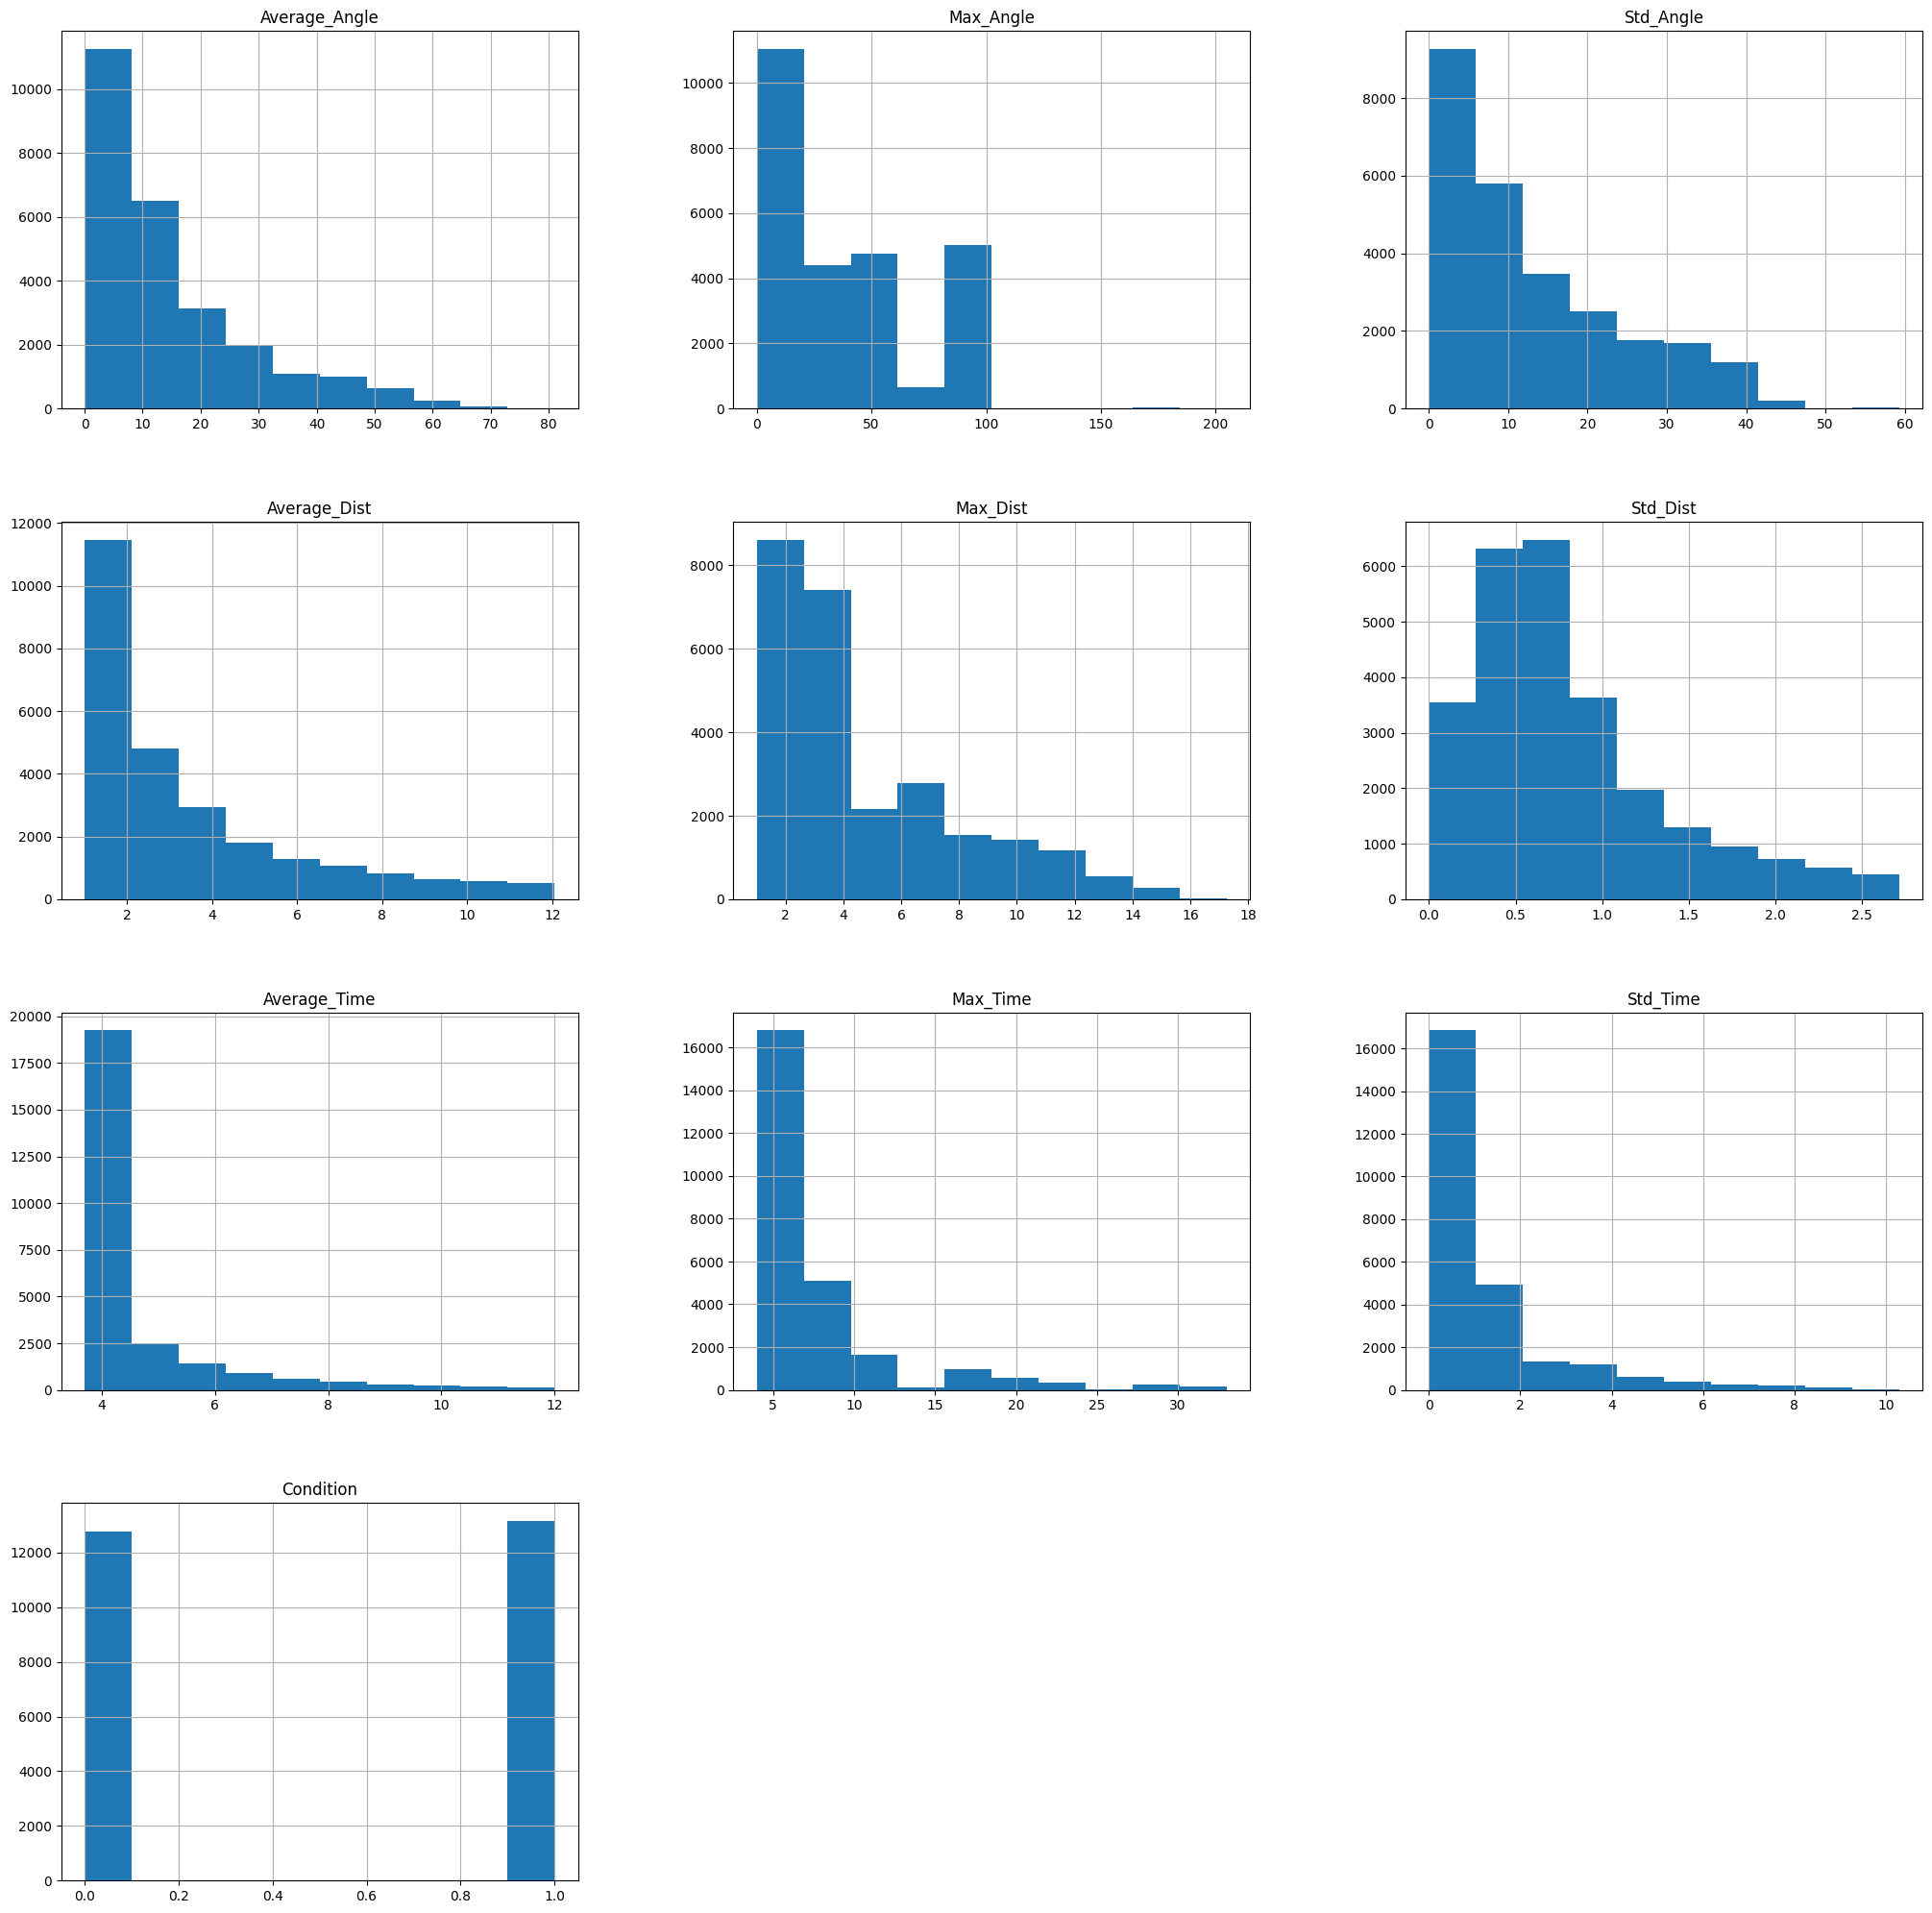

In [376]:
all_data.hist(figsize = (25, 25), grid = True)

<AxesSubplot:xlabel='Max_Dist'>

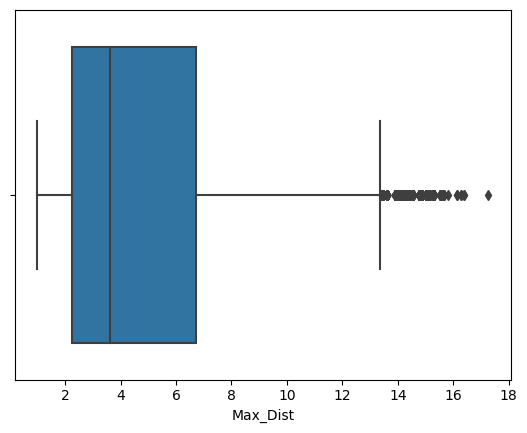

In [377]:
sns.boxplot(x=all_data['Max_Dist'])

<AxesSubplot:>

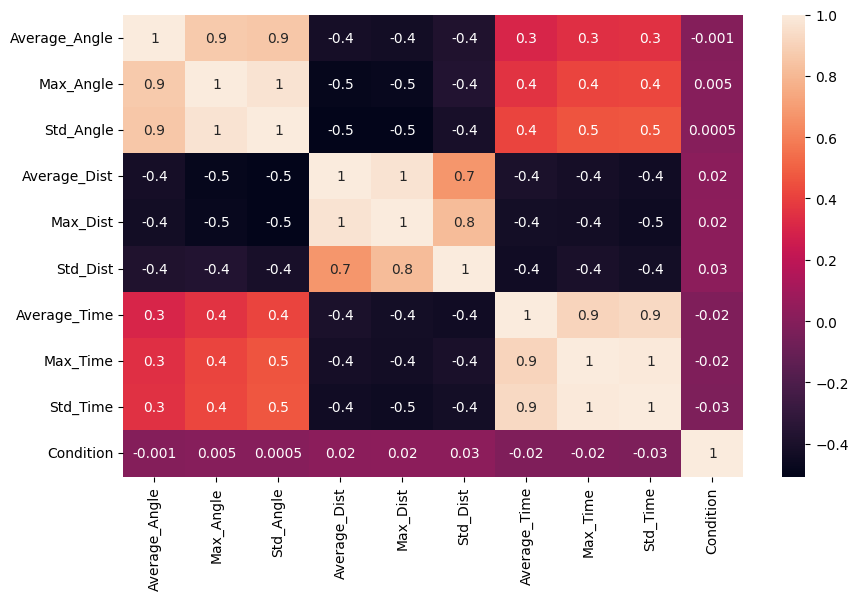

In [378]:
plt.figure(figsize=(10, 6))
sns.heatmap(all_data.corr(), annot = True, fmt = '.1g')

In [379]:
Q1 = all_data.quantile(0.25)
Q3 = all_data.quantile(0.75)
IQR = Q3 - Q1
all_data = all_data[~((all_data < (Q1 - 1.5 * IQR)) |(all_data > (Q3 + 1.5 * IQR))).any(axis=1)]
all_data.shape

(18575, 10)

In [380]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df = pd.DataFrame(scaler.fit_transform(all_data.drop('Condition', axis = 1)),
            columns=all_data.drop('Condition', axis = 1).columns, index=all_data.drop('Condition', axis = 1).index)
df['Condition'] = all_data.Condition

all_data = df

array([[<AxesSubplot:title={'center':'Average_Angle'}>,
        <AxesSubplot:title={'center':'Max_Angle'}>,
        <AxesSubplot:title={'center':'Std_Angle'}>],
       [<AxesSubplot:title={'center':'Average_Dist'}>,
        <AxesSubplot:title={'center':'Max_Dist'}>,
        <AxesSubplot:title={'center':'Std_Dist'}>],
       [<AxesSubplot:title={'center':'Average_Time'}>,
        <AxesSubplot:title={'center':'Max_Time'}>,
        <AxesSubplot:title={'center':'Std_Time'}>],
       [<AxesSubplot:title={'center':'Condition'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

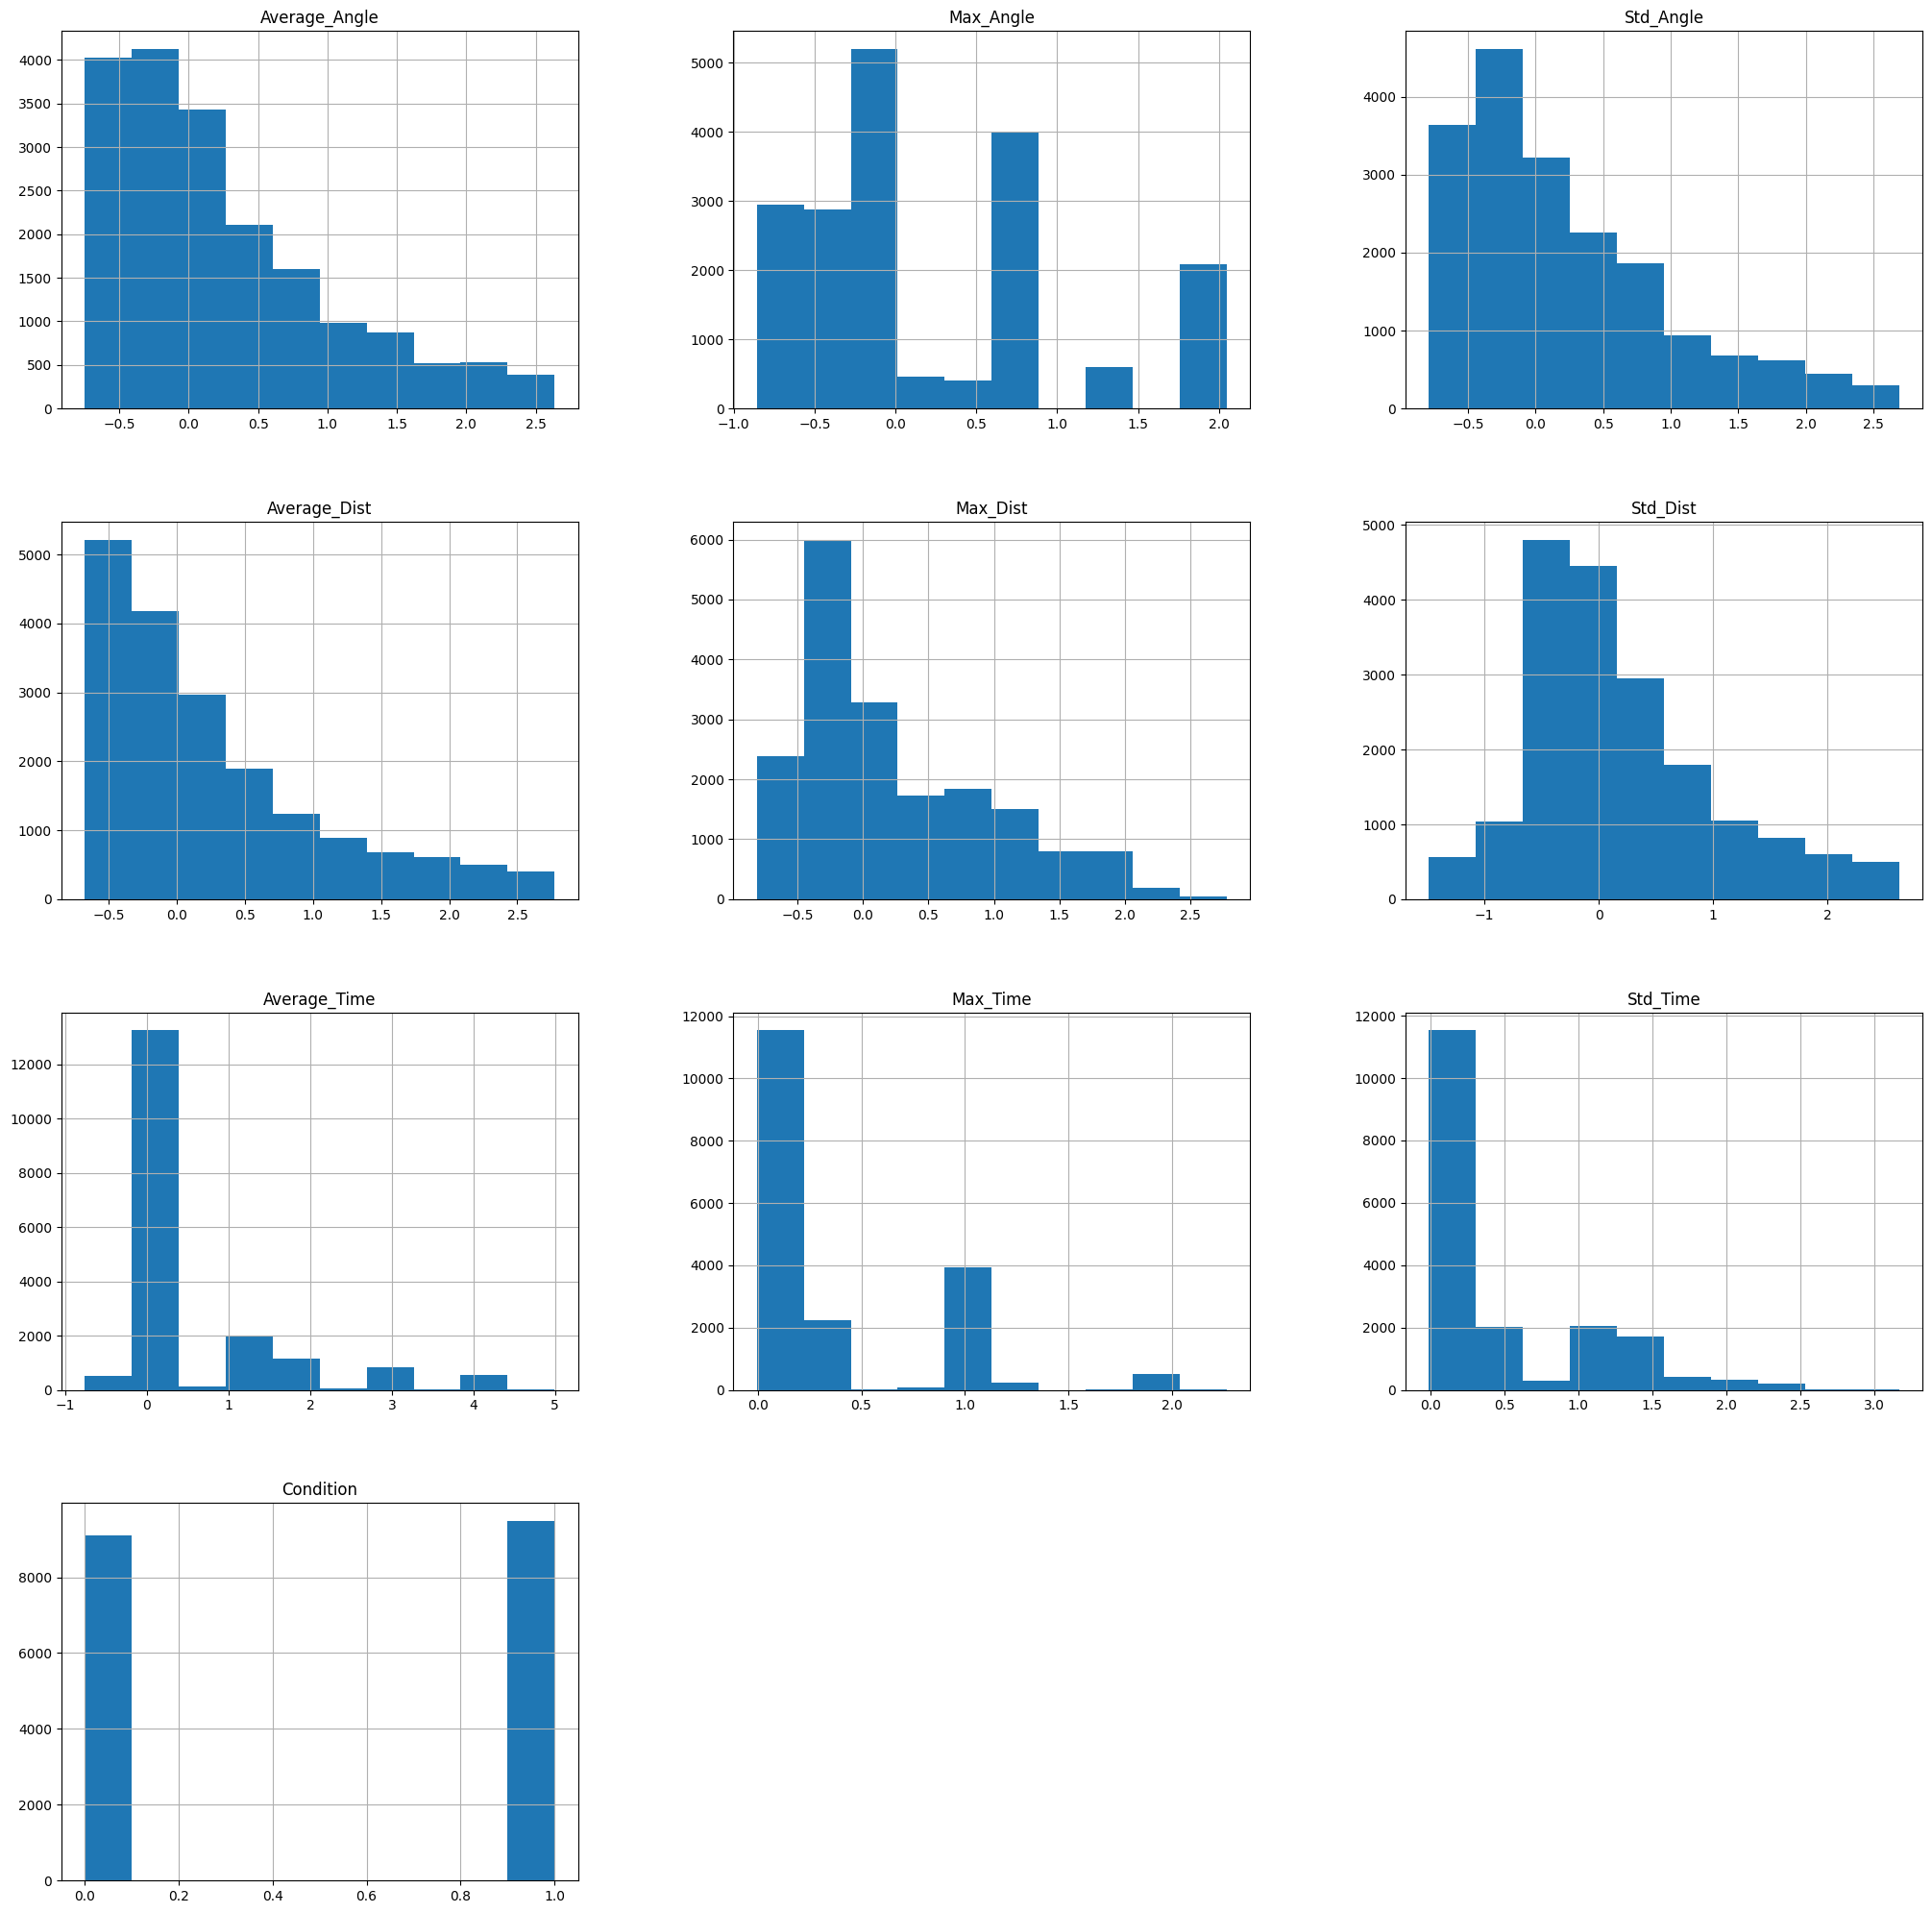

In [381]:
all_data.hist(figsize = (25, 25), grid = True)

<AxesSubplot:xlabel='Max_Dist'>

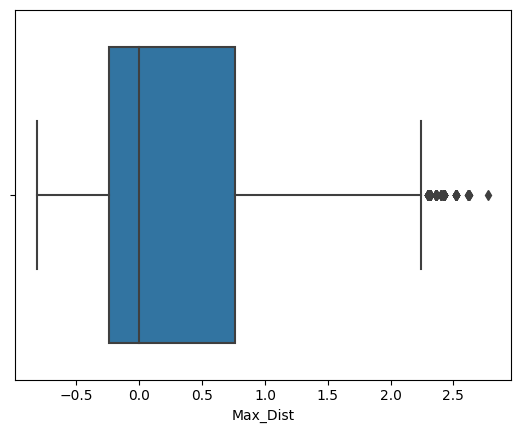

In [382]:
sns.boxplot(x=all_data['Max_Dist'])

<AxesSubplot:>

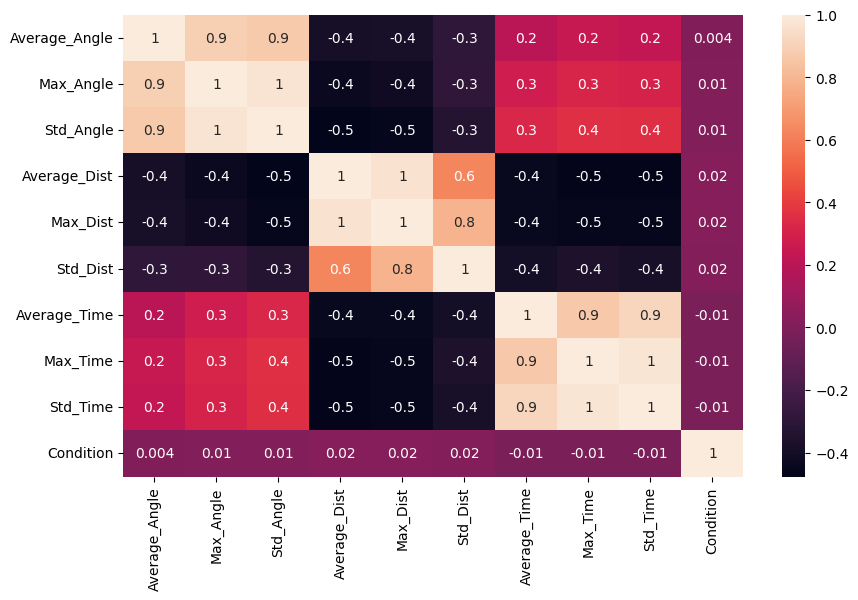

In [383]:
plt.figure(figsize=(10, 6))
sns.heatmap(all_data.corr(), annot = True, fmt = '.1g')

Обучение

In [384]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, label_binarize

In [385]:
X = all_data.drop(['Condition'], axis = 1)
y = all_data.Condition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

In [386]:
X

,Average_Angle,Max_Angle,Std_Angle,Average_Dist,Max_Dist,Std_Dist,Average_Time,Max_Time,Std_Time
22523,0.057962,-2.625683e-01,-0.279267,0.792876,0.692634,0.521474,-0.248380,0.249053,0.690736
39523,0.480664,5.953718e-01,0.543531,-0.275129,-0.137965,-0.152784,-0.000377,-0.003121,-0.004267
20234,1.296650,5.953718e-01,0.546500,-0.034969,0.000000,0.230402,-0.000402,-0.001334,-0.002313
24983,2.544852,2.048684e+00,1.595480,-0.534004,-0.426238,-0.447873,1.005073,1.000390,0.997998
42722,-0.383769,5.953718e-01,0.407490,0.621020,0.434008,0.673528,-0.000427,-0.003070,-0.005674
...,...,...,...,...,...,...,...,...,...
5261,-0.401861,-5.149697e-01,-0.521785,2.041350,1.747300,0.731724,0.001231,-0.001007,-0.002859
16971,-0.333763,-3.055935e-01,-0.287062,2.630976,2.244384,1.016776,-0.000151,-0.000503,0.000955
3195,-0.299105,-5.523467e-01,-0.540083,2.709811,2.426491,1.686662,-0.000352,-0.000805,-0.002864
10467,0.193494,4.589512e-16,0.054129,0.448047,0.870717,1.597305,-0.000402,-0.004606,-0.008898


In [387]:
y

22523    0
39523    0
20234    0
24983    0
42722    0
        ..
5261     1
16971    1
3195     1
10467    1
7209     1
Name: Condition, Length: 18575, dtype: int64

Градиентый бустинг

In [388]:
from xgboost import XGBClassifier

In [389]:
grid_param = {'learning_rate': [0.02], 
        'min_child_weight': [1, 5],
        'max_depth': [10, 50, 100],
        'n_estimators': [50, 100, 500]
        }

In [390]:
xgb = XGBClassifier()
grid_xgb = GridSearchCV(xgb, grid_param, cv = 5)

grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.02], 'max_depth': [10, 50, 100],
                         'min_child_weight': [1, 5],
                         'n_estimators': [50, 100, 500]})

In [391]:
best_clf = grid_xgb.best_estimator_
best_clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.02,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 10,
 'max_leaves': 0,
 'min_child_weight': 5,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 50,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [392]:
y_pred = best_clf.predict(X_test)

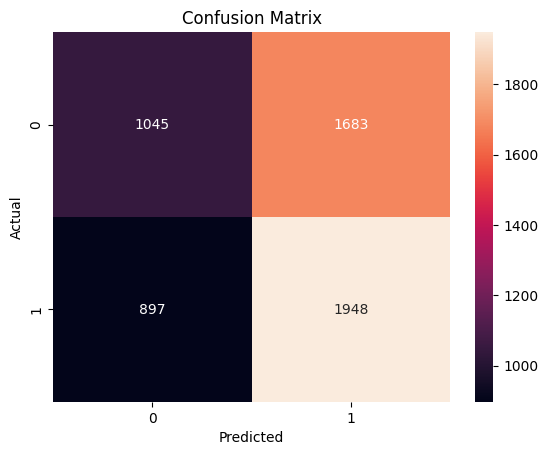

In [393]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [394]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.54      0.38      0.45      2728
     class 1       0.54      0.68      0.60      2845

    accuracy                           0.54      5573
   macro avg       0.54      0.53      0.52      5573
weighted avg       0.54      0.54      0.53      5573



Случайный лес

In [395]:
grid_param = {
    'n_estimators': [50, 100, 200, 400],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': range(2, 16, 4)
}

In [396]:
rfc = RandomForestClassifier()
grid_rfc = GridSearchCV(rfc, grid_param, cv = 3, n_jobs=-1)

grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 16, 4),
                         'n_estimators': [50, 100, 200, 400]})

In [397]:
best_clf = grid_rfc.best_estimator_
best_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'log_loss',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [398]:
y_pred = best_clf.predict(X_test)

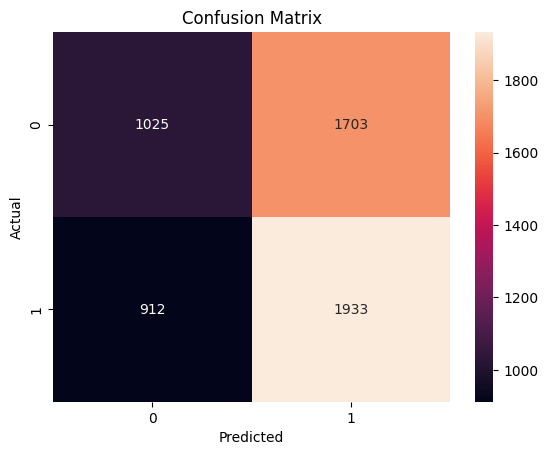

In [399]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [400]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.53      0.38      0.44      2728
     class 1       0.53      0.68      0.60      2845

    accuracy                           0.53      5573
   macro avg       0.53      0.53      0.52      5573
weighted avg       0.53      0.53      0.52      5573



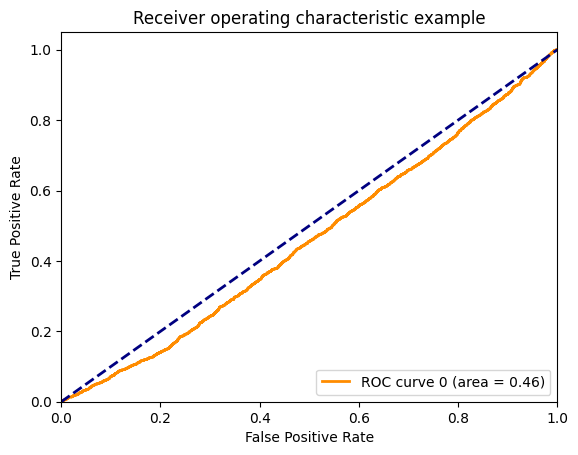

In [401]:
y_roc = label_binarize(y, classes = [0, 1])
y_test_roc = label_binarize(y_test, classes = [0, 1])
n_classes = y_roc.shape[1]

y_score = best_clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve 0 (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 0, 'Random Forest Feature Importance')

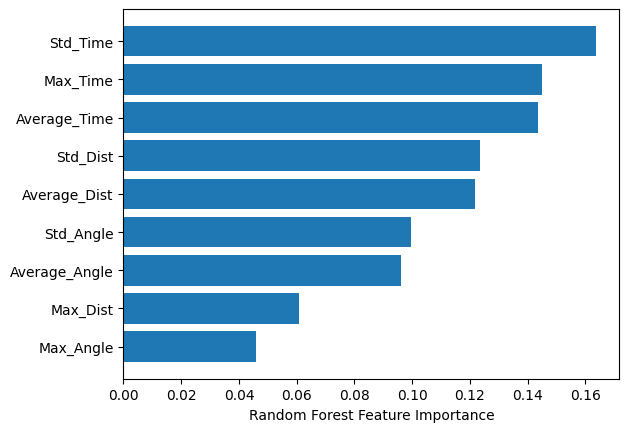

In [402]:
sorted_idx = best_clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], best_clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [403]:
np.sum(best_clf.feature_importances_)

1.0

KNN

In [404]:
grid_params = {'n_neighbors' : [i for i in range(1, 11)],
                'weights': ['uniform', 'distance'],
                'metric' : ['euclidean', 'manhattan']}

In [405]:
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, grid_params, verbose = 1, cv = 3, n_jobs = -1)
grid_knn.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [406]:
best_clf = grid_knn.best_estimator_
best_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'distance'}

In [407]:
y_pred = best_clf.predict(X_test)

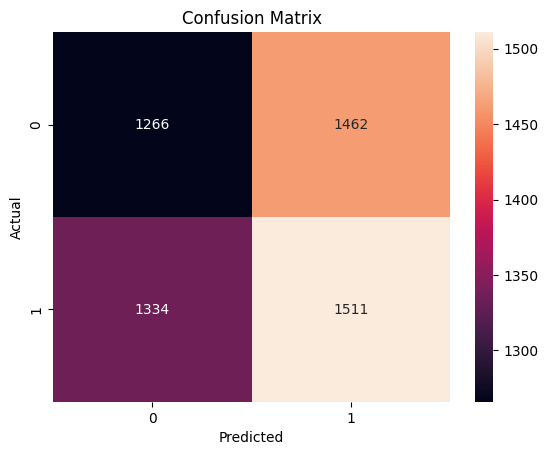

In [408]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [409]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.49      0.46      0.48      2728
     class 1       0.51      0.53      0.52      2845

    accuracy                           0.50      5573
   macro avg       0.50      0.50      0.50      5573
weighted avg       0.50      0.50      0.50      5573

